In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import itertools
import datetime
import matplotlib.dates as mdates
import numpy as np


In [31]:
#Read in the data 
# df = pd.read_csv('Data_for_graph.csv’)
# filename = 'Monthly Standard Report 8.xlsx'
# filename = 'Monthly Standard Report 8.xlsx'
filename = 'QC Standard Report 8.xlsx'
tab_name = 'Raw QC Data'
tab_name2 = 'Weekly Cumulative Collection De'
directory = '/Users/SPH/qc_data/'
# directory = './data/'


min_date = datetime.date(2020, 1,1)
max_date = datetime.date(2020, 2,24)

In [32]:
df2 = pd.read_excel(directory+filename,sheet_name=tab_name2,header=0)
df2

,InstrumentID,Week Start Date,DeviceLotNumber,Abnormal Rate,# of ABNORMAL results within 30days,# of NORMAL results within 14days,Calculated Abnormal Rate
0,Diana1,2019-08-05 00:00:00,8z711,0.0398,34,820,0.039813
1,Diana1,2019-08-05 00:00:00,8Z716,0.054,141,2470,0.054002
2,Diana1,2019-08-05 00:00:00,95126,0.0416,56,1290,0.041605
3,Diana2,2019-08-05 00:00:00,8z711,0.037,29,755,0.036990
4,Diana2,2019-08-05 00:00:00,8Z716,0.0457,113,2357,0.045749
5,Diana2,2019-08-05 00:00:00,95126,0.0412,53,1233,0.041213
6,Diana2,2019-08-05 00:00:00,95336,NaN,NaN,1,0.000000
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Diana1,2019-08-12 00:00:00,8*W16,NaN,NaN,1,0.000000
9,Diana1,2019-08-12 00:00:00,8z711,0.0381,30,758,0.038071


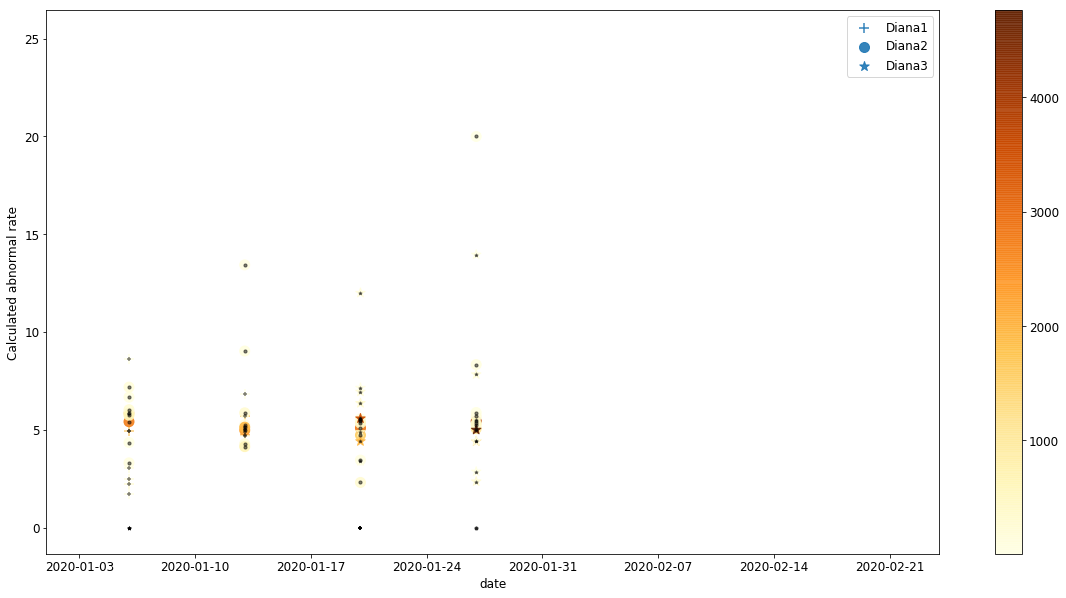

In [33]:

markers = itertools.cycle(('+', 'o', '*')) 

#plot the data
fig, ax = plt.subplots(figsize=(20,10))
for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    cbar = ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=100,marker=marker,label=InstrumentID,cmap='YlOrBr')

ax.legend()
plt.colorbar(cbar)

for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,marker=marker,label=InstrumentID,alpha=0.5)


ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
##### This is the line to change to change the x-axis dates #####
ax.set_xlim([min_date,max_date])
#Where [datetime.date(2019, 11, 1) is the 1st date in year month day and datetime.date(2020, 1, 1) is the last date in year month day

# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)

plt.show()

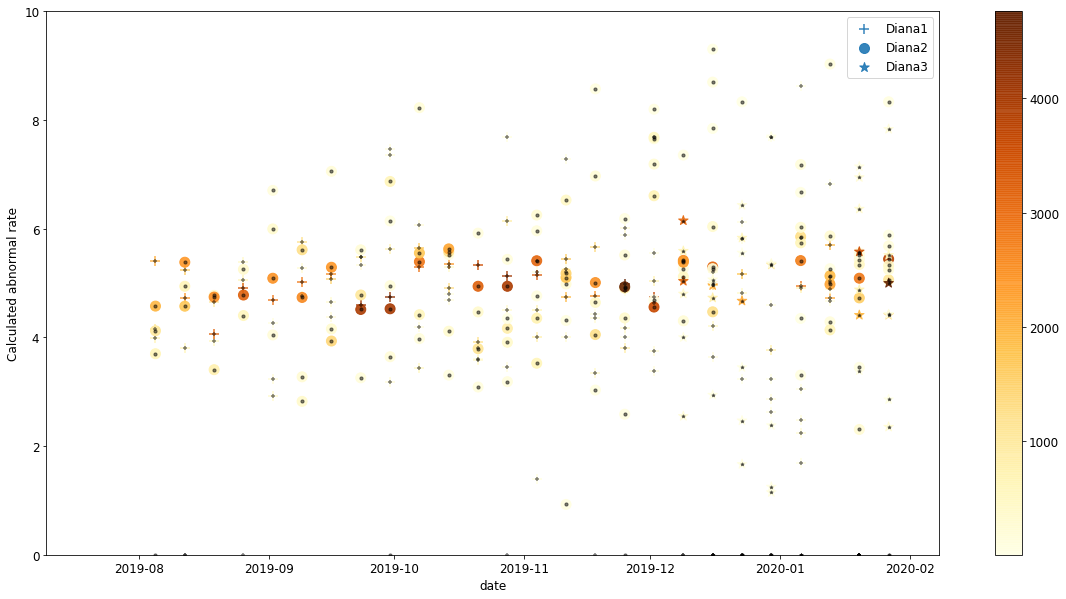

In [34]:

markers = itertools.cycle(('+', 'o', '*')) 

#plot the data
fig, ax = plt.subplots(figsize=(20,10))
for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    cbar = ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=100,marker=marker,label=InstrumentID,cmap='YlOrBr')

ax.legend()
plt.colorbar(cbar)

for InstrumentID in ['Diana1','Diana2','Diana3']:
    marker = next(markers)
    df_tempory = df2[df2['InstrumentID'] == InstrumentID]
    ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,marker=marker,label=InstrumentID,alpha=0.5)


ax.set_ylim([0,10])
ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)

plt.show()

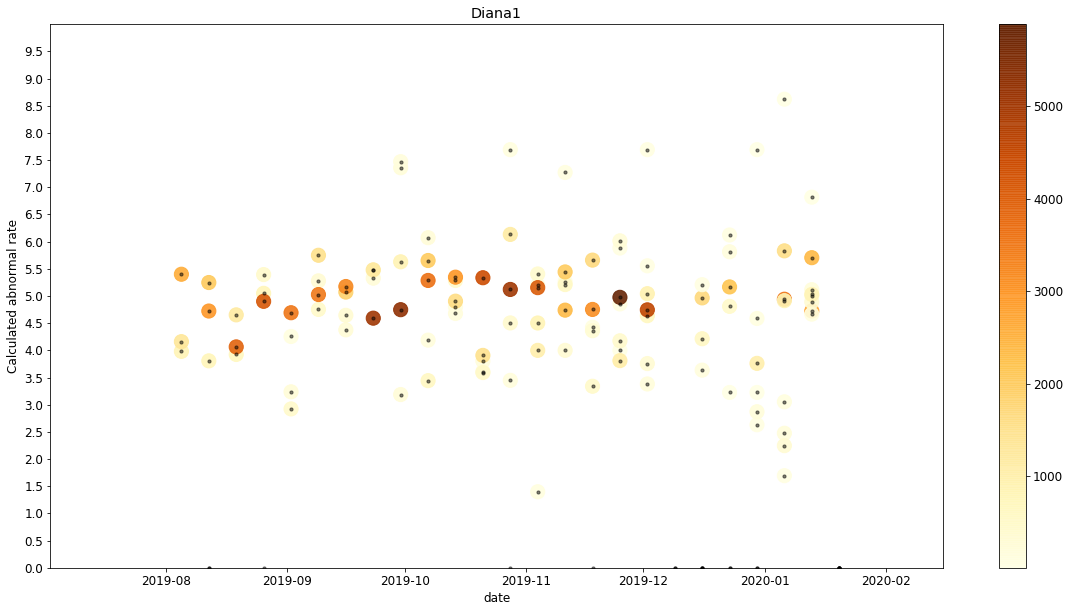

In [35]:
InstrumentID = 'Diana1'

#plot the data
fig, ax = plt.subplots(figsize=(20,10))

df_tempory = df2[df2['InstrumentID'] == InstrumentID]
cbar=ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c=(df_tempory['# of ABNORMAL results within 30days']  + df_tempory['# of NORMAL results within 14days']).values,alpha=0.9,s=200,label=InstrumentID,cmap='YlOrBr')

plt.colorbar(cbar)

ax.scatter(df_tempory['Week Start Date'].values,df_tempory['Calculated Abnormal Rate'].values*100.0,c='k',s=10,label=InstrumentID,alpha=0.5)

ax.set_yticks(np.arange(0, 10, step=0.5))
ax.set_ylim([0,10])
ax.set_xlabel('date')
ax.set_ylabel('Calculated abnormal rate')
plt.title(InstrumentID)
# plt.savefig('/Users/SPH/qc_data/abnormal_rates.png',dpi=300)

plt.show()